In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
%matplotlib inline

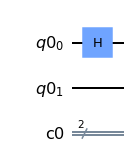

In [3]:
circuit.h(qr[0])
circuit.draw(output="mpl")

In [4]:
circuit.measure(qr, cr)

In [8]:
######Real Machine#####
IBMQ.load_account() 
provider = IBMQ.get_provider("ibm-q")
qcomp = provider.get_backend("ibmq-melbourne")
job = execute(circuit, qcomp)
job_monitor(job)
result = job.result() 
plot_histogram(result.get_counts(circuit)) 
memory = result.get_memory()
cool_memory = [int(mem, 2) for mem in memory]
print(memory)
print(cool_memory)

QiskitBackendNotFoundError: 'No backend matches the criteria'

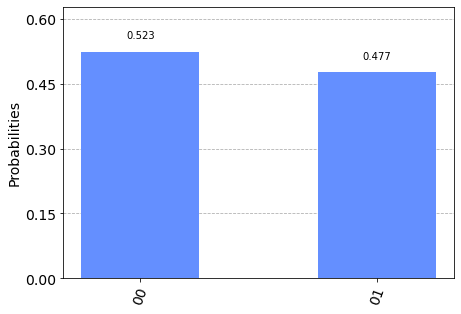

In [11]:
########Simulator#######
simulator = Aer.get_backend("qasm_simulator")
exc = execute(circuit, simulator)
res = exc.result()
#memory = result.get_memory()
#cool_memory = [int(mem, 2) for mem in memory]
#print(memory)
#print(cool_memory)
plot_histogram(res.get_counts(circuit))